In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
wine_red = pd.read_csv('winequality-red.csv')
wine_white = pd.read_csv('winequality-white.csv')
adult = pd.read_csv('adult.csv')

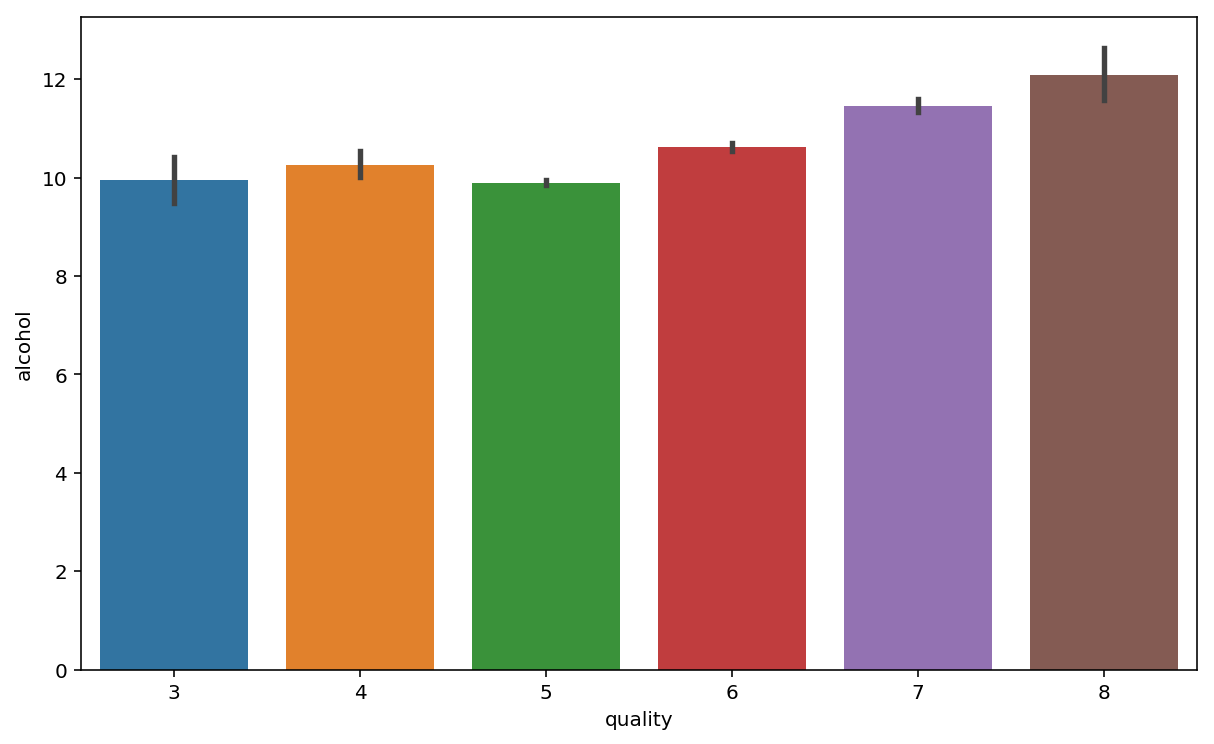

In [3]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_red)

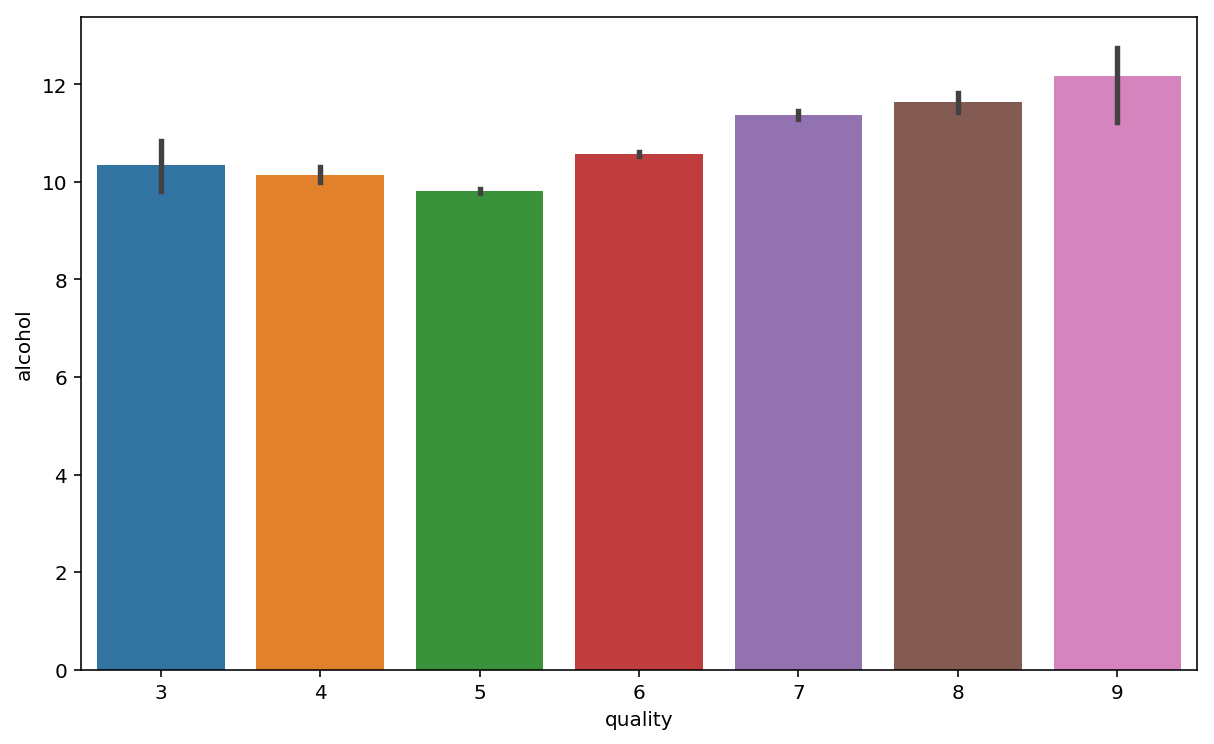

In [4]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_white)

In [5]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_red['quality'] = pd.cut(wine_red['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine_red['quality'] = label_quality.fit_transform(wine_red['quality'])
wine_red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [6]:
bins = (2, 6, 9)
group_names = ['bad', 'good']
wine_white['quality'] = pd.cut(wine_white['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine_white['quality'] = label_quality.fit_transform(wine_white['quality'])
wine_white['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [10]:
for i in range(3):
    wine_red = shuffle(wine_red)
    X = wine_red.drop('quality', axis = 1)
    y = wine_red['quality']
    print("Trial", i+1)

    for i2 in range(3):
        if i2 == 0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 80/20:")
        
        if i2 == 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 50/50:")
        
        if i2 == 2:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 20/80:")
        
        for i3 in range(3):
            if i3 == 0:
                classifier_svm = svm.SVC(kernel = 'linear')
                C_list     = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
                grid = GridSearchCV(classifier_svm, {'C':C_list}, scoring='accuracy', cv = 10)
                grid.fit(X_train, y_train)
                
                clf_svm = svm.SVC(C = grid.best_params_['C'], kernel = 'linear')
                clf_svm.fit(X_train, y_train)
                pred_svm = clf_svm.predict(X_test)
                print("Support Vector Machine: ", classification_report(y_test, pred_svm))
            
            if i3 == 1:
                classifier_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                tree_grid = GridSearchCV(classifier_dt, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                tree_grid.fit(X_train, y_train)
                
                clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = tree_grid.best_params_['max_depth'])
                clf_dt.fit(X_train, y_train)
                pred_dt = clf_dt.predict(X_test)
                print("Decision Tree: ", classification_report(y_test, pred_svm))
            
            if i3 == 2:
                classifier_rf = RandomForestClassifier(n_estimators  = 10, criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                RF_grid = GridSearchCV(classifier_rf, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                RF_grid.fit(X_train, y_train)
                
                clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = RF_grid.best_params_['max_depth'])
                clf_rf.fit(X_train, y_train)
                pred_rf = clf_rf.predict(X_test)
                print("Random Forest: ", classification_report(y_test, pred_rf))

Trial 1
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.85      1.00      0.92       271
           1       0.00      0.00      0.00        49

   micro avg       0.85      0.85      0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.85      1.00      0.92       271
           1       0.00      0.00      0.00        49

   micro avg       0.85      0.85      0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.88      0.98      0.93       271
           1       0.69      0.22      0.34        49

   micro avg       0.87      0.87      0.87       320
   macro avg       0.78      0.60      0.63       320
weighted avg       0.85      0.87      0.84       320

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.85      1.00      0.92       682
           1       0.00      0.00      0.00       118

   micro avg       0.85      0.85      0.85       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.73      0.85      0.78       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.85      1.00      0.92       682
           1       0.00      0.00      0.00       118

   micro avg       0.85      0.85      0.85       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.73      0.85      0.78       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.87      0.98      0.92       682
           1       0.48      0.13      0.20       118

   micro avg       0.85      0.85      0.85       800
   macro avg       0.67      0.55      0.56       800
weighted avg       0.81      0.85      0.81       800

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

Support Vector Machine:                precision    recall  f1-score   support

           0       0.86      1.00      0.92      1098
           1       0.00      0.00      0.00       182

   micro avg       0.86      0.86      0.86      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.74      0.86      0.79      1280

Decision Tree:                precision    recall  f1-score   support

           0       0.86      1.00      0.92      1098
           1       0.00      0.00      0.00       182

   micro avg       0.86      0.86      0.86      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.74      0.86      0.79      1280



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versi

Random Forest:                precision    recall  f1-score   support

           0       0.86      1.00      0.92      1098
           1       0.00      0.00      0.00       182

   micro avg       0.86      0.86      0.86      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.74      0.86      0.79      1280

Trial 2
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        43

   micro avg       0.87      0.87      0.87       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.75      0.87      0.80       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        43

   micro avg       0.87      0.87      0.87       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.75      0.87      0.80       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.88      0.99      0.93       277
           1       0.70      0.16      0.26        43

   micro avg       0.88      0.88      0.88       320
   macro avg       0.79      0.58      0.60       320
weighted avg       0.86      0.88      0.84       320

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

Support Vector Machine:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       697
           1       0.00      0.00      0.00       103

   micro avg       0.87      0.87      0.87       800
   macro avg       0.44      0.50      0.47       800
weighted avg       0.76      0.87      0.81       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       697
           1       0.00      0.00      0.00       103

   micro avg       0.87      0.87      0.87       800
   macro avg       0.44      0.50      0.47       800
weighted avg       0.76      0.87      0.81       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.90      0.97      0.93       697
           1       0.58      0.31      0.41       103

   micro avg       0.88      0.88      0.88       800
   macro avg       0.74      0.64      0.67       800
weighted avg       0.86      0.88      0.87       800

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

Support Vector Machine:                precision    recall  f1-score   support

           0       0.87      1.00      0.93      1110
           1       0.00      0.00      0.00       170

   micro avg       0.87      0.87      0.87      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.75      0.87      0.81      1280

Decision Tree:                precision    recall  f1-score   support

           0       0.87      1.00      0.93      1110
           1       0.00      0.00      0.00       170

   micro avg       0.87      0.87      0.87      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.75      0.87      0.81      1280



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.89      0.98      0.93      1110
           1       0.65      0.20      0.31       170

   micro avg       0.88      0.88      0.88      1280
   macro avg       0.77      0.59      0.62      1280
weighted avg       0.86      0.88      0.85      1280

Trial 3
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.86      1.00      0.93       276
           1       0.00      0.00      0.00        44

   micro avg       0.86      0.86      0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.74      0.86      0.80       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.86      1.00      0.93       276
           1       0.00      0.00      0.00        44

   micro avg       0.86      0.86      0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.74      0.86      0.80       320



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.89      0.99      0.93       276
           1       0.75      0.20      0.32        44

   micro avg       0.88      0.88      0.88       320
   macro avg       0.82      0.60      0.63       320
weighted avg       0.87      0.88      0.85       320

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       695
           1       0.00      0.00      0.00       105

   micro avg       0.87      0.87      0.87       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.75      0.87      0.81       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       695
           1       0.00      0.00      0.00       105

   micro avg       0.87      0.87      0.87       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.75      0.87      0.81       800



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.89      0.98      0.93       695
           1       0.61      0.22      0.32       105

   micro avg       0.88      0.88      0.88       800
   macro avg       0.75      0.60      0.63       800
weighted avg       0.85      0.88      0.85       800

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

Support Vector Machine:                precision    recall  f1-score   support

           0       0.87      1.00      0.93      1110
           1       0.00      0.00      0.00       170

   micro avg       0.87      0.87      0.87      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.75      0.87      0.81      1280

Decision Tree:                precision    recall  f1-score   support

           0       0.87      1.00      0.93      1110
           1       0.00      0.00      0.00       170

   micro avg       0.87      0.87      0.87      1280
   macro avg       0.43      0.50      0.46      1280
weighted avg       0.75      0.87      0.81      1280

Random Forest:                precision    recall  f1-score   support

           0       0.90      0.97      0.93      1110
           1       0.59      0.27      0.37       170

   micro avg       0.88      0.88      0.88      1280
   macro avg       0.74      0.62      0.65      1280
weighted avg     

C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
for i in range(3):
    wine_white = shuffle(wine_white)
    X = wine_white.drop('quality', axis = 1)
    y = wine_white['quality']
    print("Trial", i+1)

    for i2 in range(3):
        if i2 == 0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 80/20:")
        
        if i2 == 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 50/50:")
        
        if i2 == 2:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 20/80:")
        
        for i3 in range(3):
            if i3 == 0:
                classifier_svm = svm.SVC(kernel = 'linear')
                C_list     = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
                grid = GridSearchCV(classifier_svm, {'C':C_list}, scoring='accuracy', cv = 10)
                grid.fit(X_train, y_train)
                
                clf_svm = svm.SVC(C = grid.best_params_['C'], kernel = 'linear')
                clf_svm.fit(X_train, y_train)
                pred_svm = clf_svm.predict(X_test)
                print("Support Vector Machine: ", classification_report(y_test, pred_svm))
            
            if i3 == 1:
                classifier_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                tree_grid = GridSearchCV(classifier_dt, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                tree_grid.fit(X_train, y_train)
                
                clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = tree_grid.best_params_['max_depth'])
                clf_dt.fit(X_train, y_train)
                pred_dt = clf_dt.predict(X_test)
                print("Decision Tree: ", classification_report(y_test, pred_svm))
            
            if i3 == 2:
                classifier_rf = RandomForestClassifier(n_estimators  = 10, criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                RF_grid = GridSearchCV(classifier_rf, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                RF_grid.fit(X_train, y_train)
                
                clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = RF_grid.best_params_['max_depth'])
                clf_rf.fit(X_train, y_train)
                pred_rf = clf_rf.predict(X_test)
                print("Random Forest: ", classification_report(y_test, pred_rf))

Trial 1
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.78      1.00      0.88       768
           1       0.00      0.00      0.00       212

   micro avg       0.78      0.78      0.78       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.61      0.78      0.69       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.78      1.00      0.88       768
           1       0.00      0.00      0.00       212

   micro avg       0.78      0.78      0.78       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.61      0.78      0.69       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.83      0.97      0.90       768
           1       0.71      0.31      0.43       212

   micro avg       0.82      0.82      0.82       980
   macro avg       0.77      0.64      0.66       980
weighted avg       0.81      0.82      0.79       980

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.78      1.00      0.87      1898
           1       0.00      0.00      0.00       551

   micro avg       0.78      0.78      0.78      2449
   macro avg       0.39      0.50      0.44      2449
weighted avg       0.60      0.78      0.68      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.78      1.00      0.87      1898
           1       0.00      0.00      0.00       551

   micro avg       0.78      0.78      0.78      2449
   macro avg       0.39      0.50      0.44      2449
weighted avg       0.60      0.78      0.68      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.81      0.98      0.88      1898
           1       0.70      0.19      0.30       551

   micro avg       0.80      0.80      0.80      2449
   macro avg       0.75      0.58      0.59      2449
weighted avg       0.78      0.80      0.75      2449

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      3071
           1       0.00      0.00      0.00       848

   micro avg       0.78      0.78      0.78      3919
   macro avg       0.39      0.50      0.44      3919
weighted avg       0.61      0.78      0.69      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      3071
           1       0.00      0.00      0.00       848

   micro avg       0.78      0.78      0.78      3919
   macro avg       0.39      0.50      0.44      3919
weighted avg       0.61      0.78      0.69      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.82      0.97      0.88      3071
           1       0.63      0.21      0.31       848

   micro avg       0.80      0.80      0.80      3919
   macro avg       0.72      0.59      0.60      3919
weighted avg       0.78      0.80      0.76      3919

Trial 2
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.81      1.00      0.89       792
           1       0.00      0.00      0.00       188

   micro avg       0.81      0.81      0.81       980
   macro avg       0.40      0.50      0.45       980
weighted avg       0.65      0.81      0.72       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.81      1.00      0.89       792
           1       0.00      0.00      0.00       188

   micro avg       0.81      0.81      0.81       980
   macro avg       0.40      0.50      0.45       980
weighted avg       0.65      0.81      0.72       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.85      0.96      0.90       792
           1       0.60      0.28      0.38       188

   micro avg       0.83      0.83      0.83       980
   macro avg       0.73      0.62      0.64       980
weighted avg       0.80      0.83      0.80       980

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.79      1.00      0.88      1943
           1       0.00      0.00      0.00       506

   micro avg       0.79      0.79      0.79      2449
   macro avg       0.40      0.50      0.44      2449
weighted avg       0.63      0.79      0.70      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.79      1.00      0.88      1943
           1       0.00      0.00      0.00       506

   micro avg       0.79      0.79      0.79      2449
   macro avg       0.40      0.50      0.44      2449
weighted avg       0.63      0.79      0.70      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.84      0.95      0.89      1943
           1       0.63      0.32      0.42       506

   micro avg       0.82      0.82      0.82      2449
   macro avg       0.74      0.63      0.66      2449
weighted avg       0.80      0.82      0.80      2449

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.79      1.00      0.88      3101
           1       0.00      0.00      0.00       818

   micro avg       0.79      0.79      0.79      3919
   macro avg       0.40      0.50      0.44      3919
weighted avg       0.63      0.79      0.70      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.79      1.00      0.88      3101
           1       0.00      0.00      0.00       818

   micro avg       0.79      0.79      0.79      3919
   macro avg       0.40      0.50      0.44      3919
weighted avg       0.63      0.79      0.70      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.81      0.97      0.89      3101
           1       0.61      0.16      0.26       818

   micro avg       0.80      0.80      0.80      3919
   macro avg       0.71      0.57      0.57      3919
weighted avg       0.77      0.80      0.76      3919

Trial 3
Partition 80/20:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.80      1.00      0.89       781
           1       0.00      0.00      0.00       199

   micro avg       0.80      0.80      0.80       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.64      0.80      0.71       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.80      1.00      0.89       781
           1       0.00      0.00      0.00       199

   micro avg       0.80      0.80      0.80       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.64      0.80      0.71       980



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.83      0.95      0.89       781
           1       0.59      0.26      0.36       199

   micro avg       0.81      0.81      0.81       980
   macro avg       0.71      0.61      0.62       980
weighted avg       0.78      0.81      0.78       980

Partition 50/50:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      1908
           1       0.00      0.00      0.00       541

   micro avg       0.78      0.78      0.78      2449
   macro avg       0.39      0.50      0.44      2449
weighted avg       0.61      0.78      0.68      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      1908
           1       0.00      0.00      0.00       541

   micro avg       0.78      0.78      0.78      2449
   macro avg       0.39      0.50      0.44      2449
weighted avg       0.61      0.78      0.68      2449



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:                precision    recall  f1-score   support

           0       0.81      0.98      0.89      1908
           1       0.71      0.19      0.30       541

   micro avg       0.80      0.80      0.80      2449
   macro avg       0.76      0.58      0.59      2449
weighted avg       0.79      0.80      0.76      2449

Partition 20/80:


C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Machine:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      3072
           1       0.00      0.00      0.00       847

   micro avg       0.78      0.78      0.78      3919
   macro avg       0.39      0.50      0.44      3919
weighted avg       0.61      0.78      0.69      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      3072
           1       0.00      0.00      0.00       847

   micro avg       0.78      0.78      0.78      3919
   macro avg       0.39      0.50      0.44      3919
weighted avg       0.61      0.78      0.69      3919

Random Forest:                precision    recall  f1-score   support

           0       0.80      0.99      0.88      3072
           1       0.67      0.10      0.17       847

   micro avg       0.79      0.79      0.79      3919
   macro avg       0.74      0.54      0.53      3919
weighted avg       0.77      0.79      0.73      3919



C:\Users\Timothy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
data = [adult]
salary_map={' <=50K':1,' >50K':0}
adult['salary'] = adult['salary'].map(salary_map).astype(int)
adult['sex'] = adult['sex'].map({' Male':1,' Female':0}).astype(int)
adult['country'] = adult['country'].replace(' ?',np.nan)
adult['workclass'] = adult['workclass'].replace(' ?',np.nan)
adult['occupation'] = adult['occupation'].replace(' ?',np.nan)
adult.dropna(how='any',inplace=True)
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'
adult['country'] = adult['country'].map({'US':1,'Non-US':0}).astype(int)
adult['marital-status'] = adult['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',
                                                     ' Widowed'],'Single')
adult['marital-status'] = adult['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
adult['marital-status'] = adult['marital-status'].map({'Couple':0,'Single':1})
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}
adult['relationship'] = adult['relationship'].map(rel_map)
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
adult['race']= adult['race'].map(race_map)
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
adult['employment_type']=adult.apply(f, axis=1)
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}
adult['employment_type'] = adult['employment_type'].map(employment_map)
adult.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
adult.loc[(adult['capital-gain'] > 0),'capital-gain'] = 1
adult.loc[(adult['capital-gain'] == 0 ,'capital-gain')]= 0

In [ ]:
for i in range(3):
    adult = shuffle(adult)
    X = adult.drop('salary', axis = 1)
    y = adult['salary']
    print("Trial", i+1)

    for i2 in range(3):
        if i2 == 0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 80/20:")
        
        if i2 == 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 50/50:")
        
        if i2 == 2:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.fit_transform(X_test)
            print("Partition 20/80:")
        
        for i3 in range(3):
            if i3 == 0:
                classifier_svm = svm.SVC(kernel = 'linear')
                C_list     = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
                grid = GridSearchCV(classifier_svm, {'C':C_list}, scoring='accuracy', cv = 10)
                grid.fit(X_train, y_train)
                
                clf_svm = svm.SVC(C = grid.best_params_['C'], kernel = 'linear')
                clf_svm.fit(X_train, y_train)
                pred_svm = clf_svm.predict(X_test)
                print("Support Vector Machine: ", classification_report(y_test, pred_svm))
            
            if i3 == 1:
                classifier_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                tree_grid = GridSearchCV(classifier_dt, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                tree_grid.fit(X_train, y_train)
                
                clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = tree_grid.best_params_['max_depth'])
                clf_dt.fit(X_train, y_train)
                pred_dt = clf_dt.predict(X_test)
                print("Decision Tree: ", classification_report(y_test, pred_svm))
            
            if i3 == 2:
                classifier_rf = RandomForestClassifier(n_estimators  = 10, criterion = 'entropy')
                D_list     = [1, 2, 3, 4, 5]
                RF_grid = GridSearchCV(classifier_rf, {'max_depth':D_list}, scoring='accuracy', cv = 10)
                RF_grid.fit(X_train, y_train)
                
                clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = RF_grid.best_params_['max_depth'])
                clf_rf.fit(X_train, y_train)
                pred_rf = clf_rf.predict(X_test)
                print("Random Forest: ", classification_report(y_test, pred_rf))